In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
#import folium
#import eli5 # Feature importance evaluation
# 机器学习
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron
from sklearn.model_selection import cross_validate,train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification


from sklearn import metrics
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
#from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
#from imblearn.over_sampling import SMOTE
#from imblearn.under_sampling import NearMiss
#from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
#from collections import Counter
#from sklearn.model_selection import KFold, StratifiedKFold
#import warnings
#warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,precision_recall_fscore_support

In [40]:
# 导入库文件
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 导入数据
data_origin = pd.read_csv(r'D:\校内课程\专业课\大二\大数据\hotel_bookings\hotel_bookings.csv')
data_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [41]:
# 保留副本
data = data_origin.copy()
missing=data.isnull().sum(axis=0)
missing[missing!=0]

children         4
country        488
agent        16340
company     112593
dtype: int64

In [42]:
#缺失值处理
data.children.fillna(data.children.mode()[0],inplace=True)
data.dropna(subset=['country'],inplace=True)
#data.country.fillna(data.country.mode()[0],inplace=True)
data.agent.fillna(0, inplace=True)
data.drop('company',inplace=True, axis=1)

In [43]:
# 异常值处理
# 入住人数为0
zero_guest=data[data[['adults', 'children', 'babies']].sum(axis=1)==0]
data.drop(zero_guest.index, inplace=True)

# 入住天数为0
zero_days = data[data[['stays_in_weekend_nights',
                       'stays_in_week_nights']].sum(axis=1) == 0]
data.drop(zero_days.index, inplace=True)

# 餐食类型Undefined/SC合并
data.meal.replace("Undefined", "SC", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118092 entries, 2 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118092 non-null  object 
 1   is_canceled                     118092 non-null  int64  
 2   lead_time                       118092 non-null  int64  
 3   arrival_date_year               118092 non-null  int64  
 4   arrival_date_month              118092 non-null  object 
 5   arrival_date_week_number        118092 non-null  int64  
 6   arrival_date_day_of_month       118092 non-null  int64  
 7   stays_in_weekend_nights         118092 non-null  int64  
 8   stays_in_week_nights            118092 non-null  int64  
 9   adults                          118092 non-null  int64  
 10  children                        118092 non-null  float64
 11  babies                          118092 non-null  int64  
 12  meal            

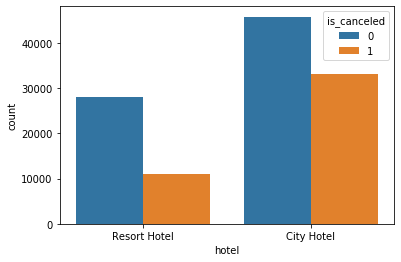

In [44]:
# 查看酒店类型与取消预定的关系
import seaborn as sns
sns.countplot(x='hotel', hue='is_canceled', data=data)
plt.show()

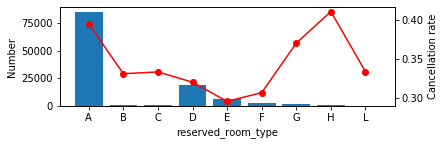

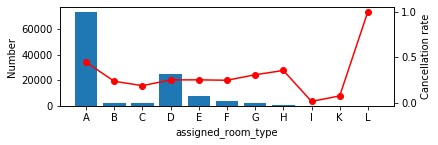

In [45]:
# 查看房间类型与取消预订的关系
index = 1
for room_type in ['reserved_room_type', 'assigned_room_type']:
    # plt.figure(figsize=(6,8))
    ax1 = plt.subplot(2, 1, index)
    index += 1
    ax2 = ax1.twinx()
    ax1.bar(
        data.groupby(room_type).size().index,
        data.groupby(room_type).size())
    ax1.set_xlabel(room_type)
    ax1.set_ylabel('Number')
    ax2.plot(
        data.groupby(room_type)['is_canceled'].mean(), 'ro-')
    ax2.set_ylabel('Cancellation rate')
    plt.show()


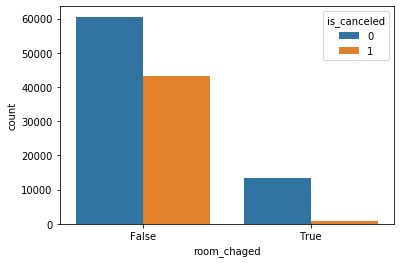

In [46]:
# 房间类型变更对取消预定的影响
data['room_chaged']=data['reserved_room_type']!=data['assigned_room_type']
sns.countplot(x='room_chaged',hue='is_canceled',data=data)

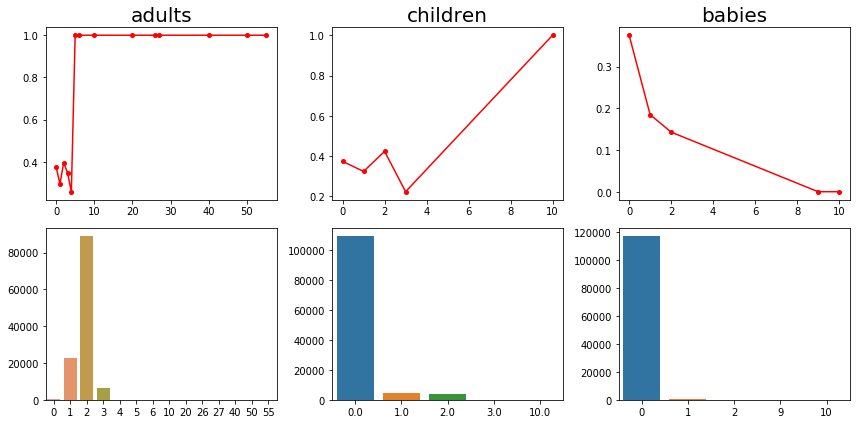

In [47]:
# 查看预定人数与取消预定的关系
plt.figure(figsize=(12, 6))
index = 0
for people in ['adults', 'children', 'babies']:
    index += 1
    plt.subplot(2, 3, index)
    plt.plot(data.groupby(people)['is_canceled'].mean(),
             'ro-',
             ms=4)
    plt.title(people, fontsize=20)
    plt.subplot(2, 3, index + 3)
    people_stats = data[people].value_counts()
    sns.barplot(people_stats.index, people_stats.values)
plt.tight_layout()
plt.show()

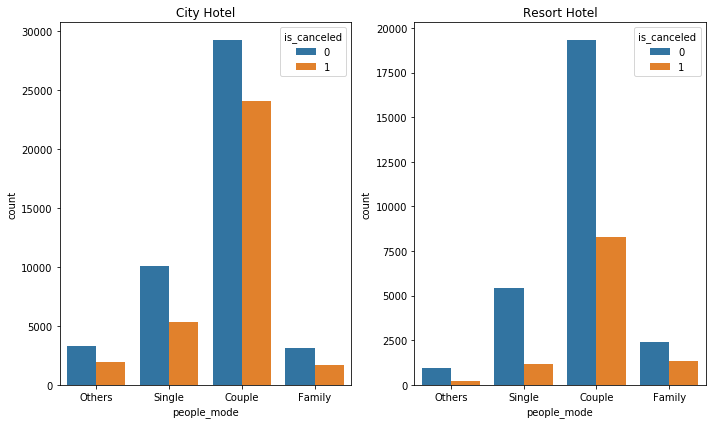

In [48]:
# 入住人数模式分析
# 单人
single = (data.adults == 1) & (data.children == 0) & (data.babies == 0)
# 双人
couple = (data.adults == 2) & (data.children == 0) & (data.babies == 0)
# 家庭
family = (data.adults >= 2) & (data.children > 0) | (data.babies > 0)

data['people_mode'] = single.astype(int) + couple.astype(int) * 2 + family.astype(int) * 3
plt.figure(figsize=(10,6))
index=1
for hotel_kind in ['City Hotel','Resort Hotel']:
    plt.subplot(1,2,index)
    index+=1
    sns.countplot(x='people_mode',
              hue='is_canceled',
              data=data[data.hotel == hotel_kind])
    plt.xticks([0, 1, 2, 3], ['Others', 'Single', 'Couple', 'Family'])
    plt.title(hotel_kind)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Uncanceled')

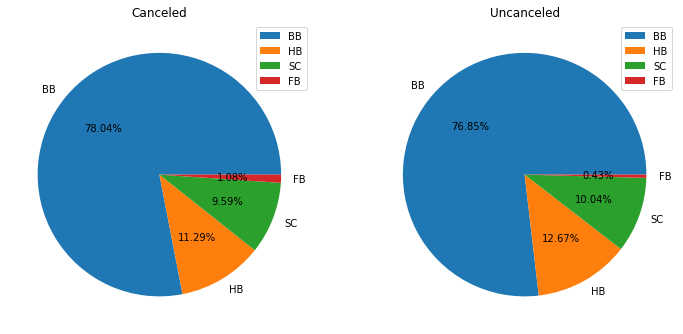

In [49]:
# 查看餐食类型与取消预订的关系
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.pie(data[data['is_canceled'] == 1].meal.value_counts(),
        labels=data[data['is_canceled'] == 1].meal.value_counts().index,
        autopct="%.2f%%")
plt.legend(loc=1)
plt.title('Canceled')
plt.subplot(122)
plt.pie(data[data['is_canceled'] == 0].meal.value_counts(),
        labels=data[data['is_canceled'] == 0].meal.value_counts().index,
        autopct="%.2f%%")
plt.legend(loc=1)
plt.title('Uncanceled')

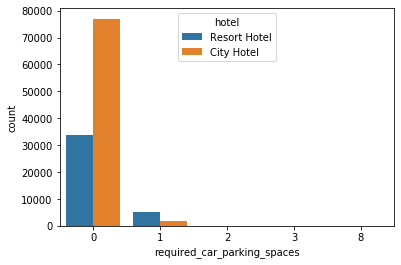

In [50]:
# 车位需求统计
sns.countplot(x='required_car_parking_spaces',hue='hotel',data=data)

Text(0, 0.5, 'Cancellation rate')

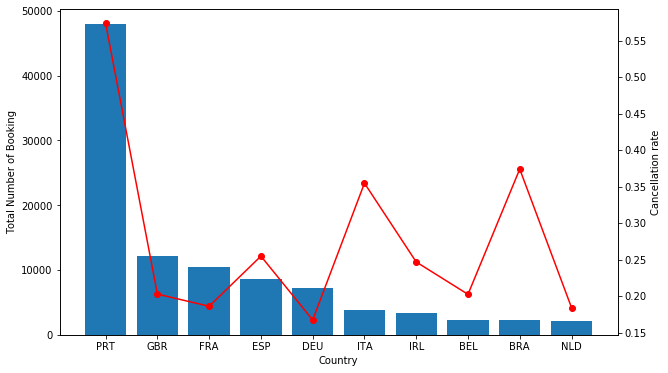

In [51]:
# 查看不同国家订单取消率
# 选取预定数前10的国家/地区
countries_10 = list(
    data.groupby('country').size().sort_values(ascending=False).head(10).index)
data[data.country.isin(countries_10)].shape[0] / data.shape[0]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()
plt.xticks(range(10), countries_10)
ax1.bar(
    range(10), data[data.country.isin(countries_10)].groupby('country').size().sort_values(ascending=False))
ax1.set_xlabel('Country')
ax1.set_ylabel('Total Number of Booking')
ax2.plot(
    range(10),
    data[data.country.isin(countries_10)].groupby('country')['is_canceled'].mean().loc[countries_10], 'ro-')
ax2.set_ylabel('Cancellation rate')

Text(0.5, 0, 'Previous Un-Cancellations')

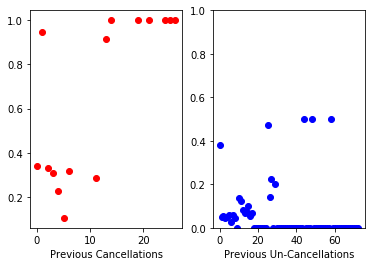

In [52]:
# 查看客户预定历史与取消订单的关系
# 是否回头客
tick_label = ['New Guest', 'Repeated Guest']
sns.countplot(x='is_repeated_guest', hue='is_canceled', data=data)
plt.xticks([0, 1], tick_label)

# 之前取消预定次数
plt.subplot(121)
plt.plot(data.groupby('previous_cancellations')['is_canceled'].mean(),
         'ro')
plt.xlabel('Previous Cancellations')
# 之前未取消预定次数
plt.subplot(122)
plt.plot(data.groupby('previous_bookings_not_canceled')['is_canceled'].mean(),
         'bo')
plt.ylim(0, 1)
plt.xlabel('Previous Un-Cancellations')

Text(0, 0.5, 'Cancellation rate')

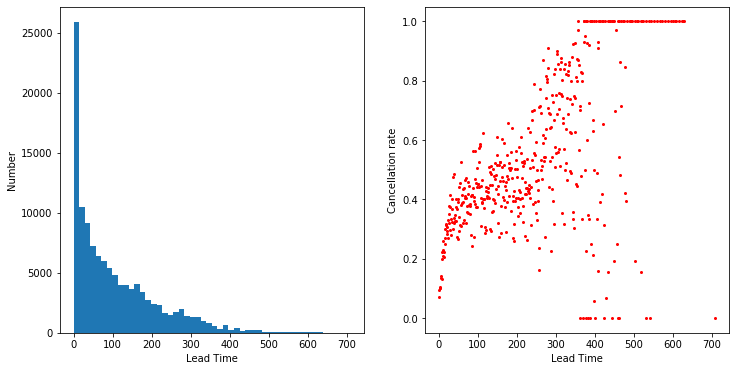

In [53]:
# 提前预定时长的分布情况
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.hist(data['lead_time'], bins=50)
plt.xlabel('Lead Time')
plt.ylabel('Number')
# 提前预定时长对取消的影响
plt.subplot(122)
plt.plot(data.groupby('lead_time')['is_canceled'].mean().index,
         data.groupby('lead_time')['is_canceled'].mean(),
         'ro',
         markersize=2)
plt.xlabel('Lead Time')
plt.ylabel('Cancellation rate')

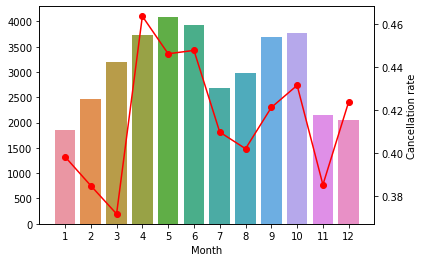

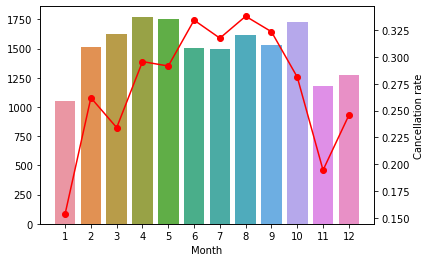

In [54]:
# 不同月份预定和取消情况
ordered_months = [
    "January", "February", "March", "April", "May", "June", "July", "August",
    "September", "October", "November", "December"
]

for hotel in ['City Hotel','Resort Hotel']:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    data_hotel=data[data.hotel==hotel]
    monthly = data_hotel.groupby('arrival_date_month').size()
    monthly /= 2
    monthly.loc[['July', 'August']] = monthly.loc[['July', 'August']] * 2 / 3
    sns.barplot(list(range(1, 13)), monthly[ordered_months], ax=ax1)
    ax2.plot(
    range(12), data_hotel.groupby('arrival_date_month')
    ['is_canceled'].mean()[ordered_months].values, 'ro-')
    ax1.set_xlabel('Month')
    ax2.set_ylabel('Cancellation rate')

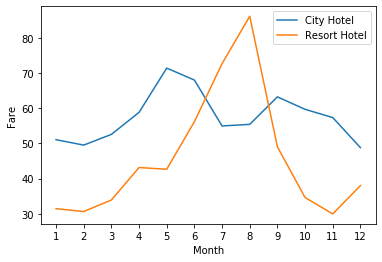

In [55]:
# 不同酒店人均价格波动
# 人均价格(不考虑babies)
data['adr_per_person'] = data['adr'] / (data['adults'] + data['children'])
plt.plot(data[data.hotel == 'City Hotel'].groupby('arrival_date_month')
         ['adr_per_person'].mean()[ordered_months],
         label='City Hotel')
plt.plot(data[data.hotel == 'Resort Hotel'].groupby('arrival_date_month')
         ['adr_per_person'].mean()[ordered_months],
         label='Resort Hotel')
plt.xlabel('Month')
plt.ylabel('Fare')
plt.xticks(np.arange(12), range(1, 13))
plt.legend()

In [56]:
# 周末和工作日取消率
# 工作日
data[data['stays_in_weekend_nights'] == 0]['is_canceled'].mean()

0.3814281227918662

In [57]:
# 周末
data[data['stays_in_weekend_nights'] != 0]['is_canceled'].mean()

0.36765757178601216

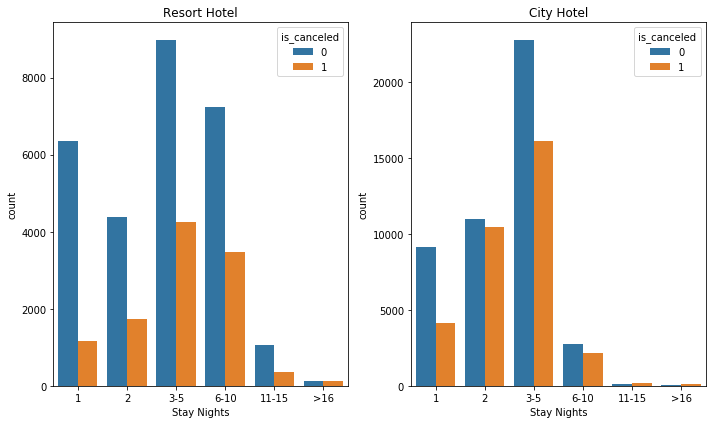

In [58]:
# 预定入住时长对取消预定的影响
data['stay_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
# 分布过散，进行数据分桶
bin = [0, 1, 2, 5, 10, 15, np.inf]
data['stay_nights_bin'] = pd.cut(data['stay_nights'], bin,
                                 labels=['1', '2', '3-5', '6-10', '11-15', '>16'])
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(x='stay_nights_bin', hue='is_canceled',
              data=data[data['hotel'] == 'Resort Hotel'])
plt.xlabel('Stay Nights')
plt.title('Resort Hotel')
plt.subplot(122)
sns.countplot(x='stay_nights_bin', hue='is_canceled',
              data=data[data['hotel'] == 'City Hotel'])
plt.xlabel('Stay Nights')
plt.title('City Hotel')
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Rate')

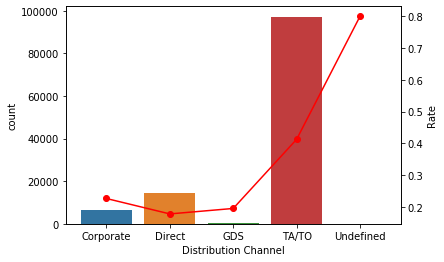

In [59]:
# 预定渠道对取消率的影响
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
sns.countplot(
    x=data['distribution_channel'],
    order=data.groupby('distribution_channel')['is_canceled'].mean().index,
    ax=ax1)
ax1.set_xlabel('Distribution Channel')
ax2.plot(data.groupby('distribution_channel')['is_canceled'].mean(), 'ro-')
ax2.set_ylabel('Rate')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118092 entries, 2 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           118092 non-null  object  
 1   is_canceled                     118092 non-null  int64   
 2   lead_time                       118092 non-null  int64   
 3   arrival_date_year               118092 non-null  int64   
 4   arrival_date_month              118092 non-null  object  
 5   arrival_date_week_number        118092 non-null  int64   
 6   arrival_date_day_of_month       118092 non-null  int64   
 7   stays_in_weekend_nights         118092 non-null  int64   
 8   stays_in_week_nights            118092 non-null  int64   
 9   adults                          118092 non-null  int64   
 10  children                        118092 non-null  float64 
 11  babies                          118092 non-null  int64   
 12  me

In [22]:
# 构建预测模型
num = [
    'lead_time', 'arrival_date_week_number', 'arrival_date_day_of_month',
    'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
    'babies', 'is_repeated_guest', 'previous_cancellations',
    'previous_bookings_not_canceled', 'agent', 'required_car_parking_spaces',
    'total_of_special_requests', 'adr', 'adr_per_person'
]

cat = [
    'hotel', 'arrival_date_month', 'meal', 'market_segment',
    'distribution_channel', 'reserved_room_type', 'deposit_type',
    'customer_type'
]

target = ['is_canceled']


ref = num+cat+target
train = data[ref]
#处理类别变量
train[cat]=train[cat].apply(LabelEncoder().fit_transform)

D:\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


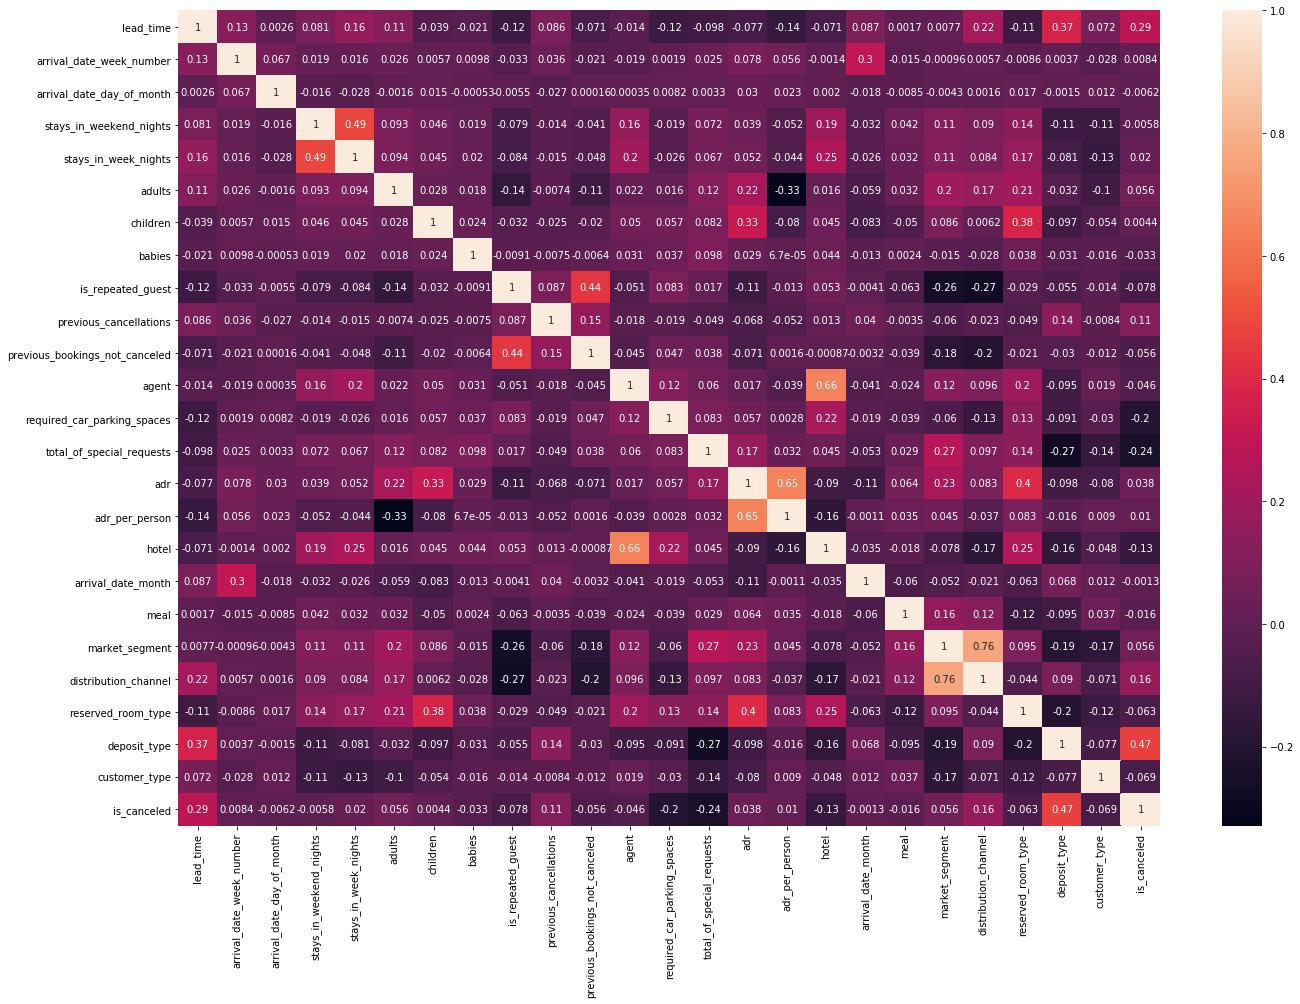

In [36]:
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(train.corr(), annot=True)

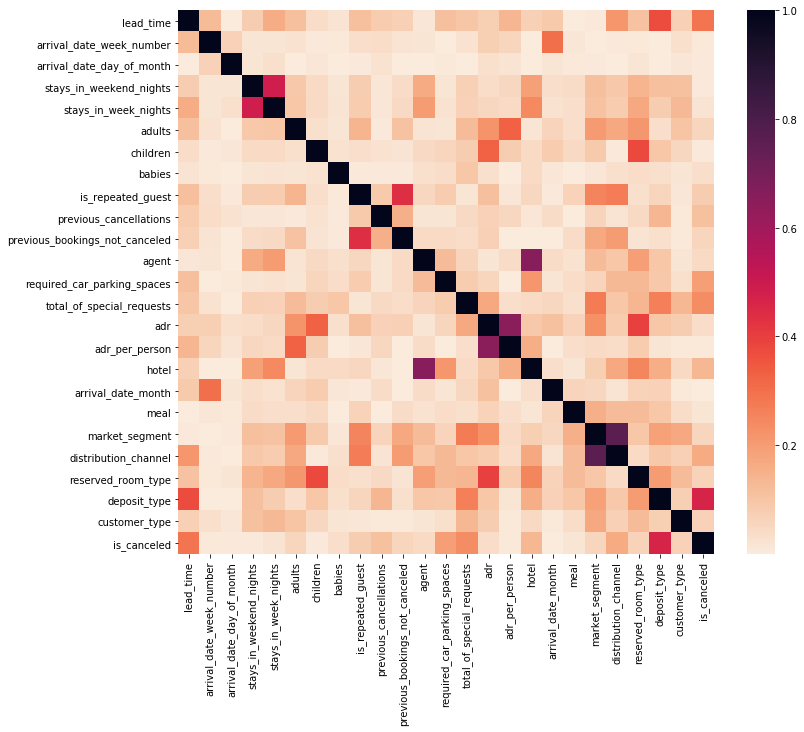

In [24]:
# 查看各列与取消预订的相关系数
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr().abs(), cmap=sns.cm.rocket_r)

In [25]:
# 分离特征变量和目标变量
X = train.drop(['is_canceled'], axis=1)
y = train['is_canceled']
#划分测试集和训练集
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,random_state=0)

# 特征缩放
std_sca = StandardScaler()
X = std_sca.fit_transform(X)

#岭回归方法
r1=RidgeClassifier(random_state=42)  
r1.fit(X_train,y_train)
print(r1.score(X_train,y_train))
print(r1.score(X_test,y_test))

0.7664306924544705
0.7660806828574331


In [26]:
#SGD方法
clf = make_pipeline(StandardScaler(),SGDClassifier(n_jobs=-1, random_state=42))
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.7683275186577696
0.7686210750939945


In [27]:
#决策树方法
clf = make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=42))
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9904932877191794
0.8231209565423568


In [29]:
#随机森林方法
clf = make_pipeline(StandardScaler(),RandomForestClassifier(n_jobs=-1, random_state=42))
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9904819970870169
0.8649188768079125


AUC: 0.8450
ACC: 0.8655
Recall: 0.7636
F1-score: 0.8093
Precesion: 0.8608
Average_Precesion: 0.7456
混淆矩阵为：
[[17131  1362]
 [ 2608  8422]]
准确率，召回率以及F1分数如下：
(0.8607931316434996, 0.7635539437896646, 0.809262996060344, None)


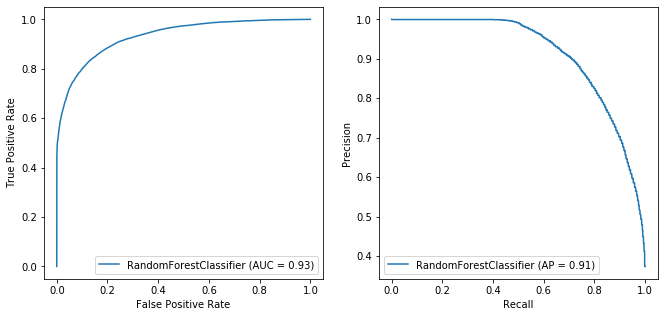

In [31]:
#随机森林
#模型参数设置
forest = RandomForestClassifier(n_jobs=-1, random_state=42)
#模型拟合
forest.fit(X_train,y_train)
#模型预测
y_pred_rf=forest.predict(X_test)
#评价指标
print ('AUC: %.4f' % metrics.roc_auc_score(y_test,y_pred_rf))
print ('ACC: %.4f' % metrics.accuracy_score(y_test,y_pred_rf))
print ('Recall: %.4f' % metrics.recall_score(y_test,y_pred_rf))
print ('F1-score: %.4f' %metrics.f1_score(y_test,y_pred_rf))
print ('Precesion: %.4f' %metrics.precision_score(y_test,y_pred_rf))
print ('Average_Precesion: %.4f' %metrics.average_precision_score(y_test,y_pred_rf))

print('混淆矩阵为：')
print(metrics.confusion_matrix(y_test,y_pred_rf))

rf=np.array([metrics.roc_auc_score(y_test,y_pred_rf),
            metrics.accuracy_score(y_test,y_pred_rf),
            metrics.recall_score(y_test,y_pred_rf),
            metrics.f1_score(y_test,y_pred_rf),
            metrics.precision_score(y_test,y_pred_rf),
            metrics.average_precision_score(y_test,y_pred_rf)])
print('准确率，召回率以及F1分数如下：')
print(precision_recall_fscore_support(y_test, y_pred_rf,average='binary'))
#print(forest.score(X_test,y_test))
fig, [ax_roc, ax_pr] = plt.subplots(1, 2, figsize=(11, 5))
plot_roc_curve(forest, X_test, y_test,ax=ax_roc)
plot_precision_recall_curve(forest, X_test, y_test, ax=ax_pr)
plt.show() 